In [1]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

import numpy as np
import pandas as pd

#for tutorial of the BPTK library, go to 

#https://github.com/transentis/bptk_py_tutorial/blob/master/notebooks/step-by-step-guides/introduction_sd_sddsl.ipynb
#https://github.com/transentis/bptk_py_tutorial/blob/master/notebooks/sd-dsl/in-depth/in_depth_sd_dsl_functions/in_depth_sd_dsl_functions.ipynb
#https://bptk.transentis.com/en/latest/docs/sd-dsl/in-depth/in_depth_sd_dsl_functions/in_depth_sd_dsl_functions.html

,vaccinateds,vaccinationrate,vaccinatedinfectionrate,delayedvaccinatedhealrate
0,0.000000e+00,350000.0,0.000000,0.000000
1,3.500000e+05,350000.0,41.756510,0.000000
2,6.999582e+05,350000.0,100.047537,0.000000
3,1.049858e+06,350000.0,179.748958,0.000000
4,1.399678e+06,350000.0,287.001791,0.000000
5,1.749391e+06,350000.0,429.514673,0.000000
6,2.098962e+06,350000.0,616.933429,0.000000
7,2.448345e+06,350000.0,861.291114,0.000000
8,2.797484e+06,350000.0,1177.553979,0.000000
9,3.146306e+06,350000.0,1584.280984,0.000000


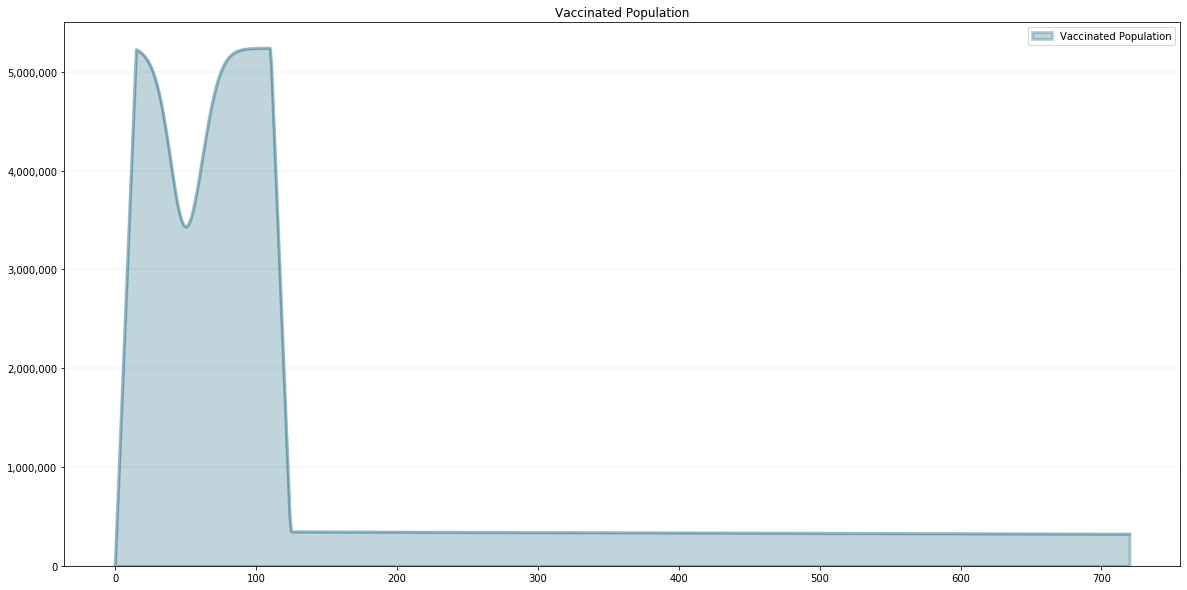

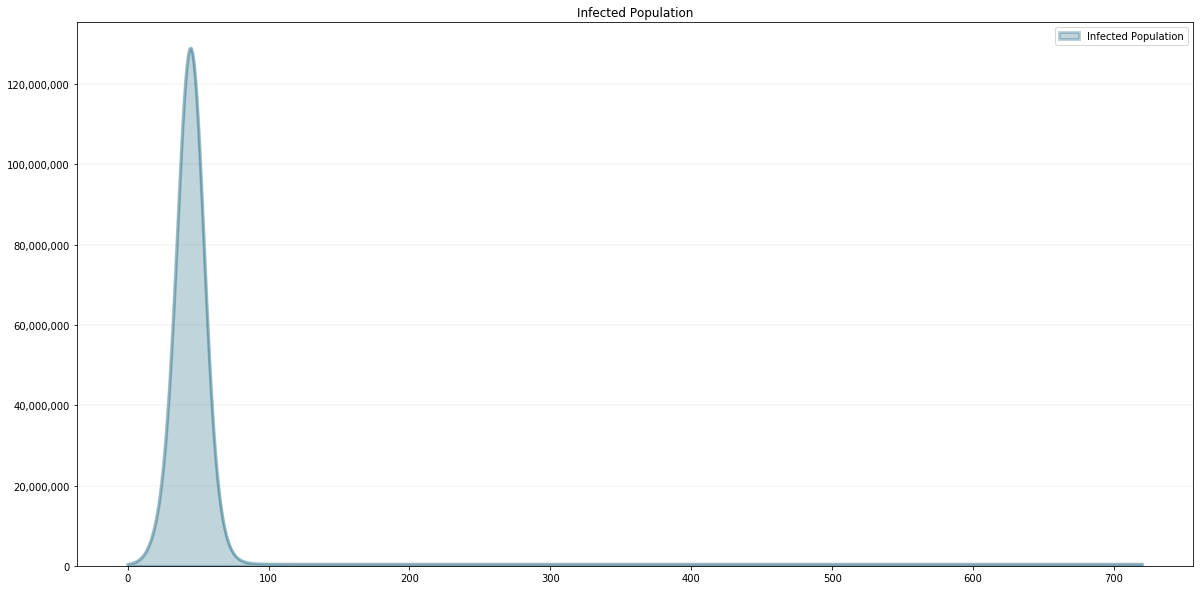

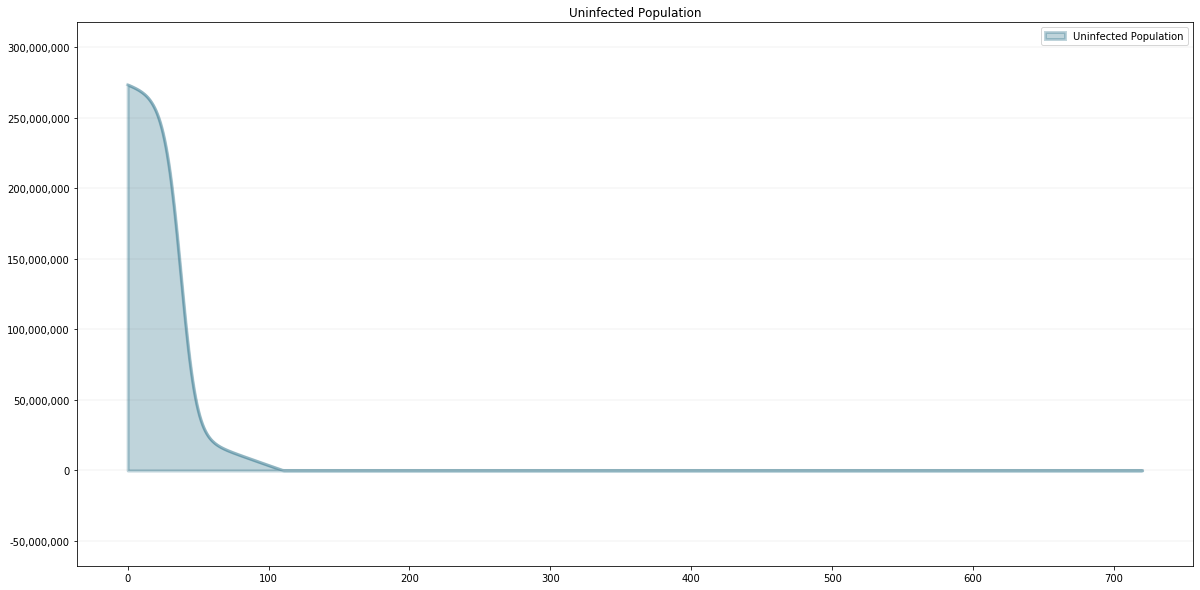

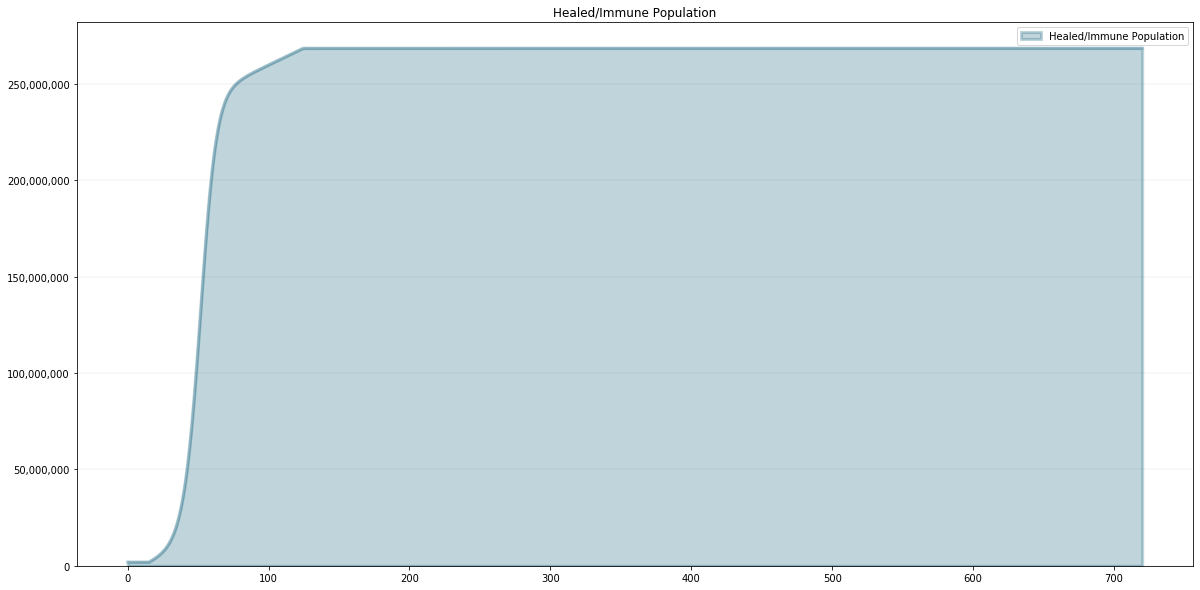

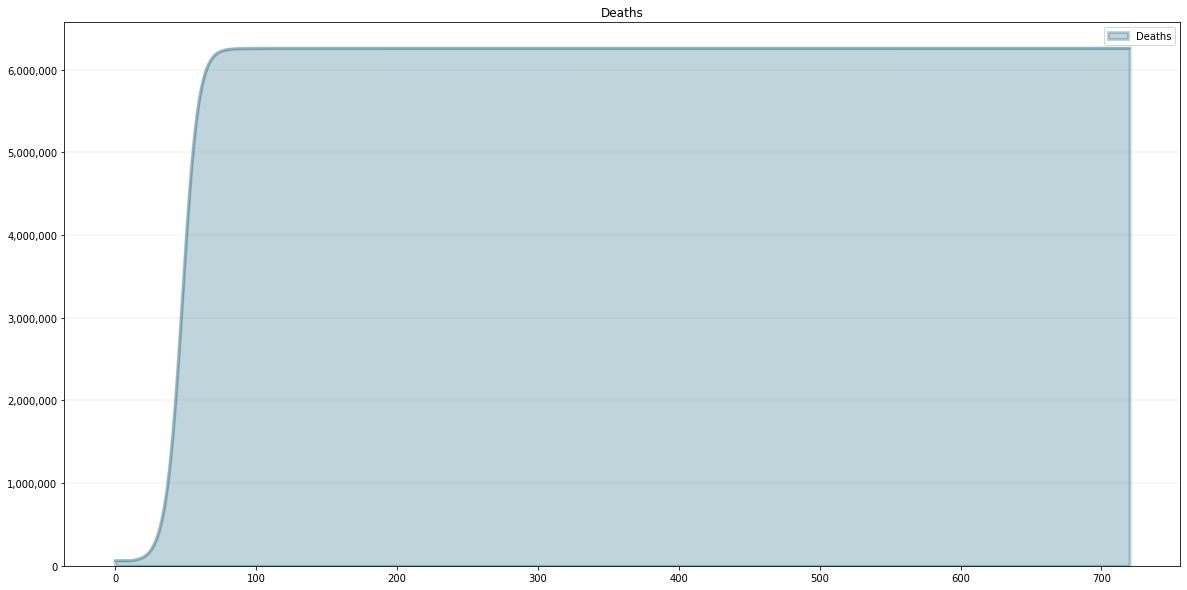

In [34]:
#COVID19

timeperiod = 720 #days

model = Model(starttime=0.0,stoptime=timeperiod,dt=1,name='Infectious Disease')

#STOCKS

population = 275600000.0 #indonesian population, 275.6mn as of 2021
healtime = 14.0 #time (days) between first symptom to full recovery
deathtime = 10.0 #time (days) between first symptom to death 
infectedsinitial = 343000.0 #343000 as of 7th of July https://www.worldometers.info/coronavirus/country/indonesia/
deathsinitial = 64000.0 # 63,760 as of 8th July
vaccinationrateinitial = 350000.0 #350,000 daily vaccination as of 24th june https://kabar24.bisnis.com/read/20210624/15/1409443/menkes-targetkan-vaksinasi-harian-capai-2-juta-dosis-pada-semester-ii2020
vaccinatedsinitial = 0.0
healedsinitial = 1990000.0 #1994573 as of 8th July

uninfecteds = model.stock("Uninfected Population")
uninfecteds.initial_value = population - infectedsinitial - vaccinatedsinitial - healedsinitial - deathsinitial

infecteds = model.stock('Infected Population')
infecteds.initial_value = infectedsinitial 

vaccinateds = model.stock('Vaccinated Population')
vaccinateds.initial_value = vaccinatedsinitial

deaths = model.stock('Deaths')
deaths.initial_value = deathsinitial

healeds = model.stock('Healed/Immune Population')
healeds.initial_value = healedsinitial

#CONVERTERS

#total population
totalpop = model.constant('Total Population')
totalpop.equation = population

#contact frequency
contactfreq = model.constant('Contact Frequency')
contactfreq.equation = 1.0

#infectivity
infectivity = model.constant('Infectivity')
infectivity.equation = 0.2 # 0.2 according to https://www.frontiersin.org/articles/10.3389/fphy.2020.589963/full

#vaccine efficacy
vaccineefficacy = model.constant('Vaccine Efficacy')
vaccineefficacy.equation = 0.6

#deadliness
deadliness = model.constant('Deadliness') 
deadliness.equation = 0.026 #2.6% of indonesian people infected died as of 9th of July

#uninfectedcontacts
uninfectedcontacts = model.converter('Uninfected Contacts')
uninfectedcontacts.equation = contactfreq * uninfecteds

#probability of contact with infecteds
probinfectedcontacts = model.converter('Probability of Contact with Infecteds')
probinfectedcontacts.equation = sd.max(0, infecteds / totalpop)
#probinfectedcontacts.equation = 0.05

#contacts between uninfecteds and infecteds
contact_un_inf = model.converter('Contacts between Uninfecteds and Infecteds')
contact_un_inf.equation = uninfectedcontacts * probinfectedcontacts


#FLOWS

#Vaccination Rate
vaccinationrate = model.flow("Vaccination Rate")
vaccinationrate.equation = sd.min(uninfecteds, vaccinationrateinitial) 

#Normal Infection Rate
normalinfectionrate = model.flow("Normal Infection Rate")
#normalinfectionrate.equation = sd.max(0, contact_un_inf * infectivity)
normalinfectionrate.equation = uninfecteds * contactfreq * probinfectedcontacts * infectivity

#Vaccinated Infection Rate
vaccinatedinfectionrate = model.flow("Vaccinated Infection Rate")
vaccinatedinfectionrate.equation = vaccinateds * contactfreq * probinfectedcontacts * infectivity * (1.0 - vaccineefficacy)

#Death Rate
deathrate = model.converter("Death Rate")
deathrate.equation = sd.max(0, (normalinfectionrate + vaccinatedinfectionrate) * deadliness)
#delayed Death Rate
delayeddeathrate = model.flow("Delayed Death Rate")
delayeddeathrate.equation = sd.delay(model, deathrate, deathtime, initial_value = 0.0)

#Normal Heal Rate
normalhealrate = model.converter("Normal Heal Rate")
normalhealrate.equation = sd.max(0, normalinfectionrate + vaccinatedinfectionrate - deathrate)
#delayed Normal Heal Rate
delayednormalhealrate = model.converter("Delayed Normal Heal Rate")
delayednormalhealrate.equation = sd.delay(model, normalhealrate, healtime, initial_value = 0.0)


#Vaccinated Heal Rate
vaccinatedhealrate = model.converter("Vaccinated Heal Rate")
vaccinatedhealrate.equation = sd.max(0, vaccinationrate - vaccinatedinfectionrate)
#delayed Vaccinated Heal Rate
delayedvaccinatedhealrate = model.converter("Delayed Vaccinated Heal Rate")
delayedvaccinatedhealrate.equation = sd.delay(model, vaccinatedhealrate, healtime, initial_value = 0.0)

uninfecteds.equation = - normalinfectionrate - vaccinationrate

vaccinateds.equation = vaccinationrate - vaccinatedinfectionrate - delayedvaccinatedhealrate

infecteds.equation = normalinfectionrate + vaccinatedinfectionrate - delayeddeathrate - delayednormalhealrate

deaths.equation = delayeddeathrate

healeds.equation = delayedvaccinatedhealrate + delayednormalhealrate

#delayedvaccinatedhealrate.plot()
vaccinateds.plot()
#vaccinatedinfectionrate.plot()
#normalinfectionrate.plot()
#delayeddeathrate.plot()
#delayednormalhealrate.plot()
infecteds.plot()
uninfecteds.plot()
healeds.plot()
deaths.plot()


pdvaccinated = np.array([vaccinateds(a) for a in range(timeperiod)])
pdvaccinationrate = np.array([vaccinationrate(a) for a in range(timeperiod)])
pdvaccinatedinfectionrate = np.array([vaccinatedinfectionrate(a) for a in range(timeperiod)])
pddelayedvaccinatedhealrate = np.array([delayedvaccinatedhealrate(a) for a in range(timeperiod)])

df = pd.DataFrame({'vaccinateds':pdvaccinated, 'vaccinationrate':pdvaccinationrate,\
                   'vaccinatedinfectionrate':pdvaccinatedinfectionrate,'delayedvaccinatedhealrate':pddelayedvaccinatedhealrate })

df.head(50)
